In [1]:
import pandas as pd
import numpy as np

In [2]:
zoo_df = pd.read_csv('C:/Users/shrey/Downloads/Assignment/13.KNN/Zoo.csv')
zoo_df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
#EDA
zoo_df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
zoo_df.hair.value_counts()

0    58
1    43
Name: hair, dtype: int64

<AxesSubplot:>

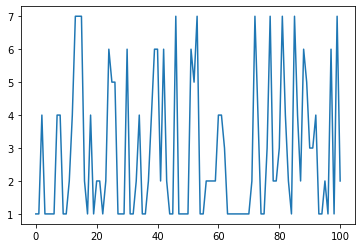

In [6]:
zoo_df.type.plot()

<AxesSubplot:ylabel='Frequency'>

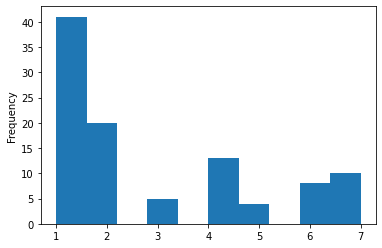

In [7]:
zoo_df.type.plot.hist()

<function matplotlib.pyplot.show(close=None, block=None)>

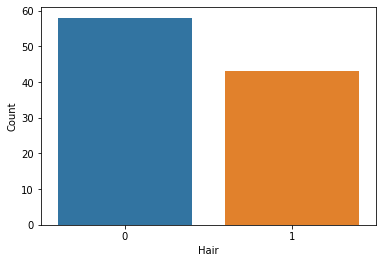

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = 'hair', data = zoo_df)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show

In [9]:
#Splitting the data
from sklearn.model_selection import train_test_split
X = zoo_df.iloc[:,1:17]
Y = zoo_df.iloc[:,17]

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [11]:
#Fitting the Knn model
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [12]:
clf.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
y_pred = clf.predict(X_test)

In [14]:
#Accuracy
from sklearn.metrics import accuracy_score
scores =[]
score = accuracy_score(y_pred, Y_test)
scores.append(score)

In [15]:
#Cross validation score of K-nearest neighbors
from sklearn.model_selection import cross_val_score
score_knn = cross_val_score(clf, X, Y, cv = 10)

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [16]:
print("Accuracy : %0.2f" % (score_knn.mean()))

Accuracy : 0.95


# Grid search cv for algorithm tunning

In [21]:
from sklearn.model_selection import GridSearchCV
n_neighbors = np.array(range(1,20))
param_grid = dict(n_neighbors=n_neighbors)

In [23]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [24]:
print(grid.best_score_)
print(grid.best_params_) 

0.97
{'n_neighbors': 1}


# Visualizing the CV results

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\shrey\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\shrey\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\shrey\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\shrey\anaconda3\lib\site-packages\s

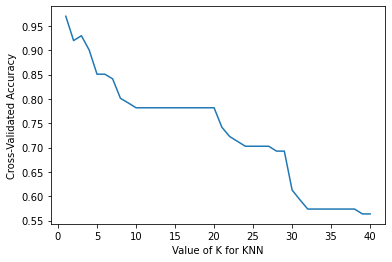

In [26]:
import matplotlib.pyplot as plt 
%matplotlib inline

k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()